In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
!pip install https://github.com/fastai/fastai/archive/1.0.49.zip

     / 163.3MB 57.1MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-vpssg6l2/wheels/1e/50/f4/007e761a28dd5b03ad92df65bbef5a8a84b799052298cb44a0
Successfully built fastai


In [0]:
from fastai.vision import *
from fastai.callbacks import *

In [0]:
from pathlib import Path

In [0]:
bs = 128

## Downloading data

In [0]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [0]:
!unzip -q data.zip -d data #Dataset

In [0]:
!ls

data  models


In [0]:
!ls data

test_WyRytb0.csv  train  train.csv


In [0]:
path = Path("./data/")
train_path = path/'train.csv'
test_path = path/'test_WyRytb0.csv'
train_path, test_path

(PosixPath('data/train.csv'), PosixPath('data/test_WyRytb0.csv'))

In [0]:
import os
import shutil

In [0]:
os.mkdir(path/'test')

In [0]:
with open(path/'test_WyRytb0.csv') as f:
  fnames = f.read().split()
  for name in fnames:
    try:
      shutil.move(path/'train'/name, path/'test'/name)
    except Exception as e:
      print(e, "can't move "+name)

[Errno 2] No such file or directory: 'data/train/image_name' can't move image_name


In [0]:
!ls data/test

10004.jpg  13296.jpg  16412.jpg  19543.jpg  22613.jpg  3947.jpg  6943.jpg
10005.jpg  13297.jpg  16415.jpg  19549.jpg  22615.jpg  3953.jpg  6948.jpg
10012.jpg  13299.jpg  16424.jpg  19557.jpg  22618.jpg  3962.jpg  6950.jpg
10013.jpg  132.jpg    16428.jpg  19558.jpg  22621.jpg  3966.jpg  6951.jpg
10017.jpg  13302.jpg  16429.jpg  19560.jpg  22622.jpg  3970.jpg  6952.jpg
10021.jpg  13303.jpg  16436.jpg  19561.jpg  22627.jpg  3975.jpg  6957.jpg
10034.jpg  13305.jpg  16442.jpg  19562.jpg  22630.jpg  3976.jpg  695.jpg
10038.jpg  1330.jpg   16444.jpg  19564.jpg  22638.jpg  3979.jpg  6964.jpg
1003.jpg   13316.jpg  16445.jpg  19568.jpg  22641.jpg  3981.jpg  6965.jpg
10040.jpg  13318.jpg  16446.jpg  19569.jpg  22649.jpg  3982.jpg  6966.jpg
10043.jpg  13321.jpg  16447.jpg  19570.jpg  22651.jpg  3983.jpg  6974.jpg
10045.jpg  13325.jpg  16449.jpg  19572.jpg  22658.jpg  3986.jpg  6980.jpg
10047.jpg  13326.jpg  1644.jpg	 19575.jpg  22659.jpg  3987.jpg  6988.jpg
10048.jpg  13329.jpg  16454.jpg  19577.j

In [0]:
np.random.seed(42)

In [0]:
data = ImageDataBunch.from_csv(path=path, folder='train', csv_labels='train.csv', test='test', ds_tfms=get_transforms(), size=128, bs=bs).normalize(imagenet_stats)

In [0]:
get_transforms()

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, res

In [0]:
data.show_batch()

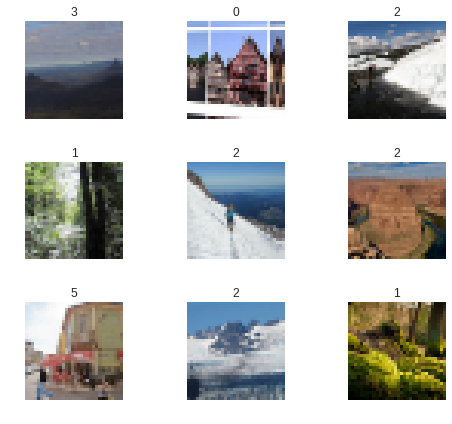

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

[0, 1, 2, 3, 4, 5]


(6, 6)

## Training: resnet34

In [0]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:02, 38896189.14it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.266784,0.911011,0.336759,0.663241,00:42
1,0.976257,0.774464,0.282443,0.717557,00:42
2,0.844268,0.717039,0.261010,0.738990,00:42
3,0.779112,0.709583,0.263946,0.736054,00:42


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

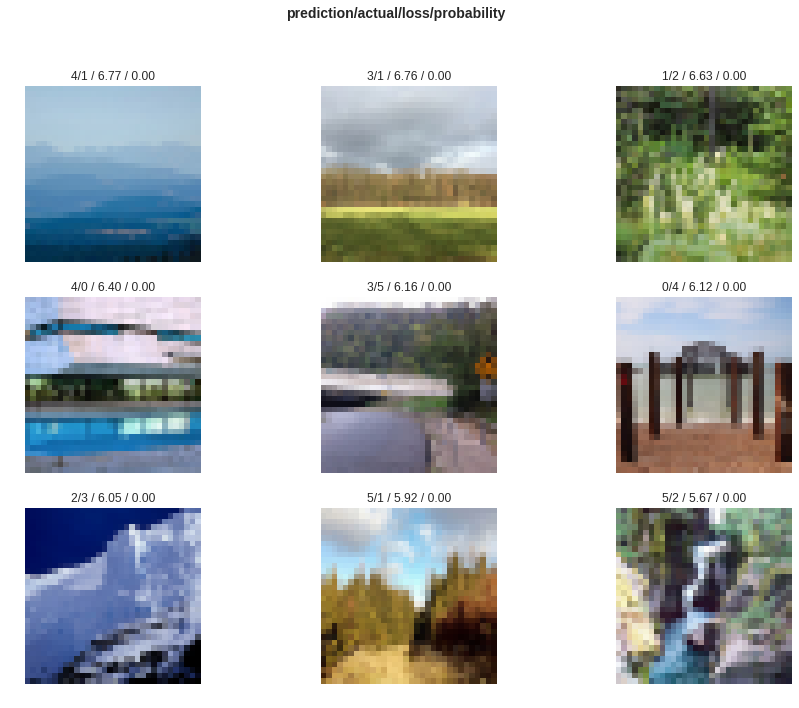

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

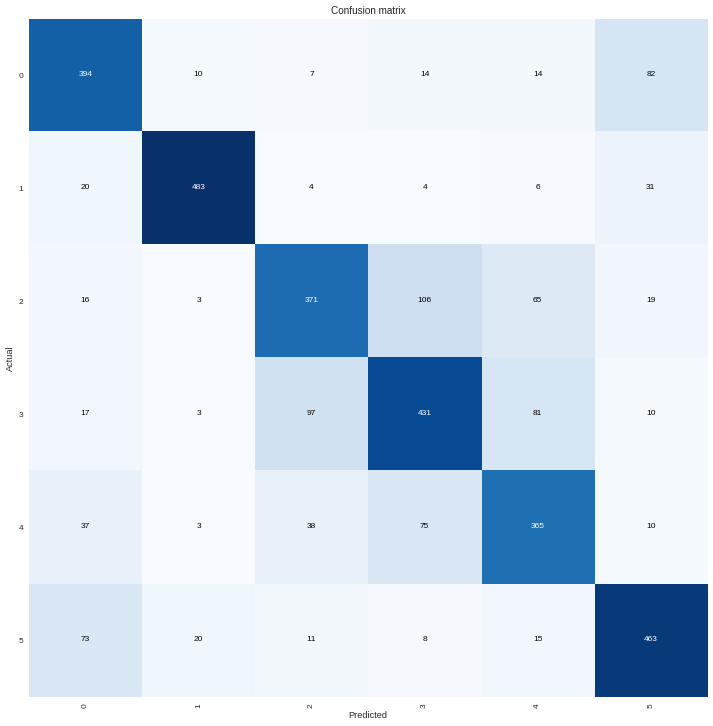

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=10)

[(2, 3, 106),
 (3, 2, 97),
 (0, 5, 82),
 (3, 4, 81),
 (4, 3, 75),
 (5, 0, 73),
 (2, 4, 65),
 (4, 2, 38),
 (4, 0, 37),
 (1, 5, 31),
 (1, 0, 20),
 (5, 1, 20),
 (2, 5, 19),
 (3, 0, 17),
 (2, 0, 16),
 (5, 4, 15),
 (0, 3, 14),
 (0, 4, 14),
 (5, 2, 11),
 (0, 1, 10),
 (3, 5, 10),
 (4, 5, 10)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.576308,0.453361,0.160893,0.839107,00:42


In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


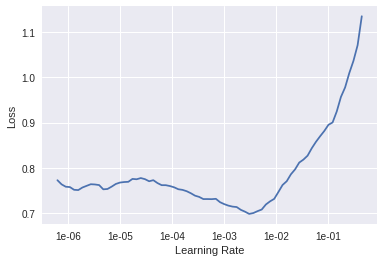

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-1');
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.597087,0.546477,0.192308,0.807692,00:42
1,0.445383,0.409283,0.144157,0.855843,00:42


## Training: resnet50

In [0]:
learn50 = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:03, 32486186.95it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


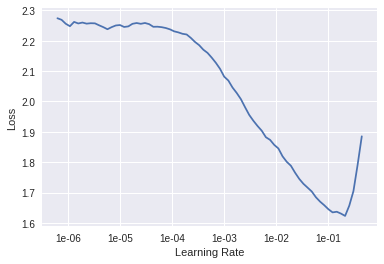

In [0]:
learn50.lr_find()
learn50.recorder.plot()

In [0]:
learn50.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.287646,0.946804,0.337052,00:46
1,1.018322,0.838732,0.311509,00:43
2,0.863036,0.764059,0.283324,00:43
3,0.787979,0.696648,0.261891,00:43
4,0.704334,0.648842,0.242220,00:42
5,0.661405,0.620676,0.232824,00:42
6,0.638722,0.609212,0.230182,00:42
7,0.619996,0.604674,0.232237,00:42


In [0]:
learn50.save('stage-1-50')

In [0]:
learn50.load('stage-1-50')
learn50.unfreeze()
learn50.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.565983,0.557909,0.180564,00:44
1,0.488310,0.472096,0.158544,00:43
2,0.419462,0.395939,0.136817,00:43
3,0.340554,0.348157,0.121257,00:43
4,0.254627,0.344655,0.119201,00:44


## Submission

In [0]:
log_preds, test_labels = learn50.get_preds(ds_type=DatasetType.Test)

In [0]:
preds = np.argmax(log_preds, 1)
preds

tensor([1, 5, 4,  ..., 5, 4, 2])

In [0]:
import numpy as np
import pandas as pd

In [0]:
a = np.array(preds)

In [0]:
a

array([1, 5, 4, 1, ..., 1, 5, 4, 2])

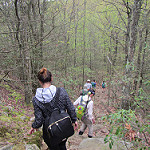

In [0]:
data.test_ds.x[0]

In [0]:
submission = pd.DataFrame({'image_name': os.listdir('data/test'), 'label': a})
submission.head(10)

,image_name,label
0,2977.jpg,1
1,22751.jpg,5
2,16653.jpg,4
3,11240.jpg,1
4,3705.jpg,3
5,21795.jpg,3
6,20852.jpg,3
7,15083.jpg,5
8,1918.jpg,1
9,15513.jpg,5


In [0]:
submission.to_csv(path/'submission_fastai.csv', index=False)

## Increasing Resolutions

In [0]:
sizes = [32, 64, 128, 224]

In [0]:
def get_data(sz, bs):
  data = ImageDataBunch.from_csv(path=path, folder='train', csv_labels='train.csv', test='test', ds_tfms=get_transforms(), size=sz, bs=bs).normalize(imagenet_stats)
  return data

### Using Default LR

In [0]:
learn50 = create_cnn(get_data(8, int(2048/8)), models.resnet50, metrics=error_rate)
learn50.save('res50_0')
learn50.save('res50_8')
learn50 = create_cnn(get_data(16, int(2048/16)), models.resnet50, metrics=error_rate).load('res50_8')
learn50.save('res50_16')
learn50 = create_cnn(get_data(24, int(2048/24)), models.resnet50, metrics=error_rate).load('res50_16')
learn50.save('res50_24')
learn50 = create_cnn(get_data(32, int(2048/32)), models.resnet50, metrics=error_rate).load('res50_24')
learn50.save('res50_32')
learn50 = create_cnn(get_data(64, int(2048/64)), models.resnet50, metrics=error_rate).load('res50_32')
learn50.save('res50_64')
learn50 = create_cnn(get_data(128, int(2048/128)), models.resnet50, metrics=error_rate).load('res50_64')
learn50.save('res50_128')
learn50 = create_cnn(get_data(224, int(2048/224)), models.resnet50, metrics=error_rate).load('res50_128')
learn50.save('res50_224')

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 86634274.60it/s]
/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
/usr/

In [0]:
def train_model(sz, i):
  learn50 = cnn_learner(get_data(sz, int(2048/sz)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_'+str(sz-8))
  learn50.fit_one_cycle(6*i)
  learn50.lr_find()
  learn50.recorder.plot()
  learn50.unfreeze()
  learn50.fit_one_cycle(2*i)
  learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.759551,1.521545,0.565766,0.434234,00:45
1,1.545098,1.354019,0.524075,0.475925,00:36
2,1.410805,1.333309,0.485614,0.514386,00:36
3,1.335333,1.229496,0.485026,0.514974,00:36
4,1.283319,1.211169,0.474457,0.525543,00:36
5,1.257781,1.196861,0.473282,0.526718,00:36


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.161956,1.066450,0.394304,0.605696,00:39
1,1.064270,1.010087,0.382854,0.617146,00:37


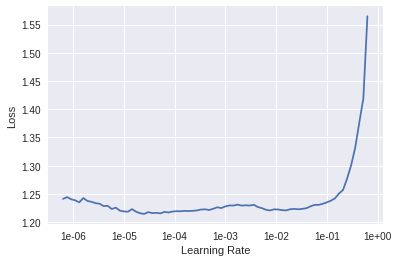

In [0]:
train_model(8, 1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.111081,0.996740,0.382560,0.617440,00:46
1,0.997523,0.903223,0.342043,0.657957,00:39
2,0.919696,0.840568,0.321491,0.678509,00:39
3,0.870404,0.797709,0.298591,0.701409,00:39
4,0.835952,0.772790,0.292132,0.707868,00:39
5,0.814418,0.744103,0.284792,0.715208,00:39
6,0.783959,0.715394,0.264240,0.735760,00:38
7,0.752664,0.698991,0.256606,0.743394,00:38
8,0.733604,0.691886,0.256900,0.743100,00:39
9,0.718130,0.684016,0.254551,0.745449,00:39


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.726796,0.674134,0.248092,0.751908,00:41
1,0.664386,0.595715,0.223723,0.776277,00:41
2,0.572557,0.550967,0.197005,0.802995,00:40
3,0.485740,0.534627,0.197299,0.802701,00:40


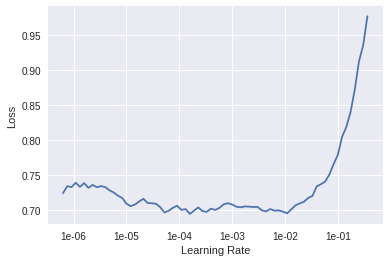

In [0]:
train_model(16, 2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.628082,0.528469,0.194950,0.805050,00:54
1,0.578523,0.483048,0.179683,0.820317,00:44
2,0.541987,0.455162,0.165003,0.834997,00:44
3,0.510325,0.431081,0.156195,0.843805,00:44
4,0.499880,0.418385,0.158250,0.841750,00:44
5,0.488936,0.408076,0.144157,0.855843,00:44
6,0.462988,0.401698,0.151791,0.848209,00:44
7,0.463543,0.399131,0.144745,0.855255,00:45
8,0.445084,0.385178,0.141809,0.858191,00:44
9,0.418602,0.383578,0.139460,0.860540,00:44


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.423190,0.437791,0.152672,0.847328,00:48
1,0.480756,0.456715,0.158250,0.841750,00:46
2,0.437672,0.408703,0.143864,0.856136,00:46
3,0.360811,0.388588,0.138873,0.861127,00:46
4,0.273741,0.355883,0.128009,0.871991,00:46
5,0.221587,0.356205,0.125073,0.874927,00:46


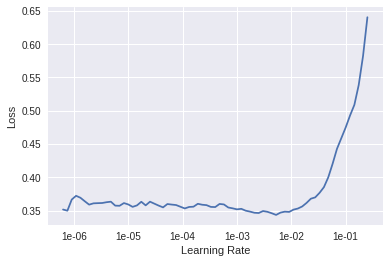

In [0]:
train_model(24, 3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.324896,0.236298,0.087493,0.912507,00:57
1,0.321739,0.230930,0.084263,0.915737,00:49
2,0.318063,0.225866,0.082501,0.917499,00:49
3,0.304488,0.223015,0.082208,0.917792,00:49
4,0.288130,0.222096,0.081327,0.918673,00:49
5,0.290896,0.225838,0.081621,0.918379,00:49
6,0.297339,0.220929,0.082208,0.917792,00:48
7,0.285662,0.221240,0.081621,0.918379,00:49
8,0.257591,0.232818,0.086612,0.913388,00:49
9,0.256309,0.218919,0.078391,0.921609,00:50


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.262459,0.258512,0.094539,0.905461,00:52
1,0.361905,0.355001,0.134175,0.865825,00:52
2,0.377583,0.351897,0.126835,0.873165,00:53
3,0.345667,0.325878,0.117733,0.882267,00:52
4,0.271570,0.326948,0.116853,0.883147,00:53
5,0.212483,0.289362,0.105402,0.894598,00:52
6,0.146470,0.292777,0.104521,0.895479,00:52
7,0.130304,0.284591,0.096594,0.903406,00:52


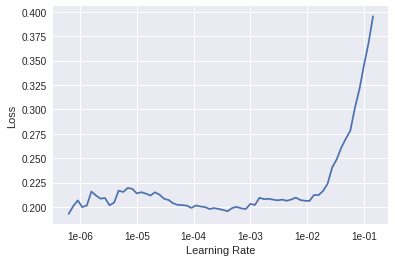

In [0]:
train_model(32, 4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.359233,0.252325,0.090429,0.909571,01:21
1,0.319873,0.230772,0.083676,0.916324,01:12
2,0.303358,0.220011,0.078685,0.921315,01:11
3,0.314671,0.207956,0.071051,0.928949,01:11
4,0.273161,0.194883,0.072519,0.927481,01:11
5,0.275955,0.198131,0.068409,0.931591,01:11
6,0.283660,0.196034,0.070757,0.929242,01:11
7,0.252206,0.190717,0.067528,0.932472,01:12
8,0.264854,0.194641,0.071638,0.928362,01:12
9,0.247397,0.190884,0.071932,0.928068,01:12


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.242696,0.380557,0.085144,0.914856,01:21
1,0.361851,0.787929,0.141221,0.858779,01:19
2,0.444945,0.318685,0.110100,0.889900,01:18
3,0.335176,0.307125,0.094539,0.905461,01:17
4,0.282390,0.350144,0.098356,0.901644,01:17
5,0.288043,0.236031,0.087493,0.912507,01:18
6,0.211369,0.218985,0.076629,0.923371,01:18
7,0.149983,0.209275,0.070757,0.929242,01:18
8,0.125628,0.263909,0.071638,0.928362,01:18
9,0.103202,0.216672,0.071638,0.928362,01:18


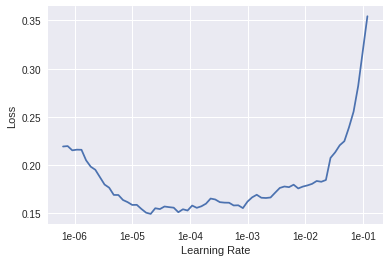

In [0]:
sz = 64; i = 5
learn50 = cnn_learner(get_data(sz, int(2048/sz)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_32')
learn50.fit_one_cycle(6*i)
learn50.lr_find()
learn50.recorder.plot()
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

In [0]:
sz = 128; i = 6
learn50 = cnn_learner(get_data(sz, bs), models.resnet50, metrics=[error_rate, accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_128')]).load('res50_64')
learn50.fit_one_cycle(6*i)

NameError: ignored

In [0]:
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.125881,0.135488,0.044334,0.955666,01:50
1,0.135564,0.175335,0.062537,0.937463,01:47
2,0.161741,0.201337,0.067528,0.932472,01:47
3,0.163132,0.204636,0.062537,0.937463,01:47
4,0.156010,0.174478,0.058133,0.941867,01:47
5,0.132755,0.188535,0.067528,0.932472,01:47
6,0.110205,0.192716,0.061950,0.938051,01:47
7,0.091851,0.173065,0.055197,0.944803,01:47
8,0.067179,0.169080,0.053142,0.946858,01:47
9,0.053067,0.174598,0.050499,0.949501,01:47


Better model found at epoch 0 with accuracy value: 0.9556664824485779.


In [0]:
sz = 224; i = 7
learn50 = cnn_learner(get_data(sz, bs), models.resnet50, metrics=[error_rate, accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_224')]).load('res50_128')
learn50.fit_one_cycle(6*i)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.209349,0.153545,0.058720,0.941280,04:11
1,0.187544,0.149935,0.056958,0.943042,03:55
2,0.183295,0.145504,0.056371,0.943629,03:55
3,0.177424,0.143209,0.051380,0.948620,03:55
4,0.172139,0.139902,0.053729,0.946271,03:55
5,0.170591,0.145031,0.053729,0.946271,03:54
6,0.163252,0.141625,0.055784,0.944216,03:55
7,0.161027,0.140239,0.052261,0.947739,03:54
8,0.156105,0.141827,0.054316,0.945684,03:54
9,0.153164,0.141644,0.053729,0.946271,03:55


Better model found at epoch 0 with accuracy value: 0.9412800669670105.
Better model found at epoch 1 with accuracy value: 0.9430416822433472.
Better model found at epoch 2 with accuracy value: 0.9436289072036743.
Better model found at epoch 3 with accuracy value: 0.948620080947876.
Better model found at epoch 14 with accuracy value: 0.9497944712638855.


KeyboardInterrupt: ignored

In [0]:
sz = 224; i = 7
learn50.load('best_224')
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.178092,0.114164,0.043159,0.956841,04:07
1,0.172704,0.113424,0.039930,0.960070,04:07
2,0.188210,0.125072,0.045214,0.954786,04:07
3,0.171467,0.126202,0.044334,0.955666,04:06
4,0.189348,0.412518,0.071345,0.928655,04:06
5,0.179394,0.142148,0.049618,0.950382,04:07
6,0.176880,0.142025,0.052261,0.947739,04:06
7,0.186361,0.133860,0.046976,0.953024,04:07
8,0.169429,0.136757,0.046389,0.953611,04:07
9,0.150861,0.146162,0.049912,0.950088,04:06


Better model found at epoch 0 with accuracy value: 0.9568408727645874.
Better model found at epoch 1 with accuracy value: 0.9600704908370972.


### Submission

In [0]:
import numpy as np
import pandas as pd

In [0]:
learn50.load('best_224_1')
log_preds, test_labels = learn50.get_preds(ds_type=DatasetType.Test)

In [0]:
preds = np.argmax(log_preds, 1)
preds

tensor([1, 5, 4,  ..., 5, 4, 2])

In [0]:
a = np.array(preds)

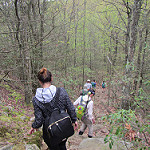

In [0]:
data.test_ds.x[0]

In [0]:
submission = pd.DataFrame({'image_name': os.listdir('data/test'), 'label': a})
submission.head(10)

,image_name,label
0,2977.jpg,1
1,22751.jpg,5
2,16653.jpg,4
3,11240.jpg,1
4,3705.jpg,3
5,21795.jpg,3
6,20852.jpg,3
7,15083.jpg,5
8,1918.jpg,1
9,15513.jpg,5


In [0]:
submission.to_csv(path/'submission_fastai_res50.csv', index=False)

### Mixup

In [0]:
learn50 = cnn_learner(get_data(224, 64), models.resnet50, metrics=[error_rate, accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_224_mixup')]).load('res50_224').mixup()

In [0]:
learn50.fit(8)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.861002,0.247960,0.045508,0.954492,03:48
1,0.821692,0.255642,0.048444,0.951556,03:48
2,0.802235,0.263137,0.050206,0.949794,03:47
3,0.790082,0.247659,0.051674,0.948326,03:48
4,0.795858,0.268697,0.051967,0.948033,03:48
5,0.787484,0.284122,0.057546,0.942455,03:48
6,0.782838,0.452889,0.055784,0.944216,03:48
7,0.785303,0.388259,0.054022,0.945978,03:48


Better model found at epoch 0 with accuracy value: 0.9544920921325684.


In [0]:
learn50.save('mixup_8')
learn50.fit(5)
learn50.save('mixup_5')


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.807260,0.249060,0.048738,0.951262,03:48
1,0.800422,0.268218,0.049912,0.950088,03:47
2,0.801828,0.490744,0.054316,0.945684,03:48
3,0.796153,0.632599,0.056958,0.943042,03:48
4,0.784049,0.489603,0.052261,0.947739,03:48


Better model found at epoch 0 with accuracy value: 0.9512624740600586.


In [0]:
learn50.unfreeze()
learn50.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.819321,0.352948,0.083969,0.916031,05:00
1,0.830303,0.345952,0.073400,0.926600,04:58
2,0.796078,0.766462,0.078097,0.921903,04:58
3,0.747264,1.314404,0.064298,0.935702,04:58
4,0.744026,0.389547,0.064298,0.935702,04:58


Better model found at epoch 0 with accuracy value: 0.9160305261611938.
Better model found at epoch 1 with accuracy value: 0.9266000986099243.
Better model found at epoch 3 with accuracy value: 0.9357017278671265.


In [0]:
import numpy as np
import pandas as pd

In [0]:
log_preds, test_labels = learn50.get_preds(ds_type=DatasetType.Test)

In [0]:
preds = np.argmax(log_preds, 1)
preds

tensor([1, 5, 4,  ..., 5, 4, 2])

In [0]:
a = np.array(preds)

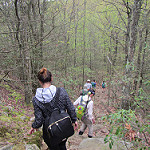

In [0]:
data.test_ds.x[0]

In [0]:
submission = pd.DataFrame({'image_name': os.listdir('data/test'), 'label': a})
submission.head(10)

,image_name,label
0,2977.jpg,1
1,22751.jpg,5
2,16653.jpg,4
3,11240.jpg,1
4,3705.jpg,3
5,21795.jpg,3
6,20852.jpg,3
7,15083.jpg,5
8,1918.jpg,1
9,15513.jpg,5


In [0]:
submission.to_csv(path/'submission_fastai_res50_mixup.csv', index=False)

## Using Mixup

In [0]:
learn50 = create_cnn(get_data(8, int(2048/8)), models.resnet50, metrics=[error_rate, accuracy])
learn50.save('res50_0')
learn50.save('res50_8')
learn50 = create_cnn(get_data(16, int(2048/16)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_8').mixup()
learn50.save('res50_16')
learn50 = create_cnn(get_data(24, int(2048/24)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_16').mixup()
learn50.save('res50_24')
learn50 = create_cnn(get_data(32, int(2048/32)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_24').mixup()
learn50.save('res50_32')
learn50 = create_cnn(get_data(64, int(2048/64)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_32').mixup()
learn50.save('res50_64')
learn50 = create_cnn(get_data(128, int(2048/128)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_64').mixup()
learn50.save('res50_128')
learn50 = create_cnn(get_data(224, int(2048/128)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_128').mixup()
learn50.save('res50_224')

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn

In [0]:
def train_model(sz, i):
  learn50 = cnn_learner(get_data(sz, int(2048/sz)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_'+str(sz-8)).mixup()
  learn50.fit_one_cycle(6*i)
#   learn50.lr_find()
#   learn50.recorder.plot()
  learn50.unfreeze()
  learn50.fit_one_cycle(2*i)
  learn50.save('res50_'+str(sz))

In [0]:
train_model(8, 1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.885935,1.457754,0.552261,0.447739,00:36
1,1.695290,1.369971,0.518203,0.481797,00:36
2,1.603603,1.338810,0.505872,0.494128,00:36
3,1.554395,1.292951,0.491486,0.508514,00:37
4,1.514549,1.285209,0.480035,0.519965,00:37
5,1.496907,1.269221,0.482678,0.517322,00:37


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.465362,1.150992,0.407516,0.592484,00:39
1,1.400214,1.052115,0.371697,0.628303,00:38


In [0]:
train_model(16, 2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.391648,1.128642,0.389607,0.610393,00:40
1,1.333231,1.101440,0.350264,0.649736,00:40
2,1.302544,1.027559,0.337639,0.662361,00:40
3,1.281060,0.959042,0.320023,0.679977,00:40
4,1.246704,0.937051,0.311803,0.688197,00:40
5,1.224211,0.909136,0.300059,0.699941,00:40
6,1.209841,0.932826,0.290664,0.709336,00:40
7,1.200586,0.836767,0.287434,0.712566,00:40
8,1.193769,0.862349,0.285085,0.714915,00:40
9,1.178107,0.828990,0.281562,0.718438,00:40


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.160570,0.838043,0.277745,0.722255,00:43
1,1.129687,0.731935,0.239871,0.760129,00:42
2,1.087797,0.686575,0.223723,0.776277,00:42
3,1.042480,0.652604,0.213447,0.786553,00:42


In [0]:
train_model(24, 3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.105103,0.668706,0.218438,0.781562,00:55
1,1.080162,0.635364,0.199060,0.800940,00:45
2,1.066391,0.609345,0.190252,0.809748,00:45
3,1.040396,0.568430,0.171169,0.828831,00:45
4,1.031952,0.574018,0.168526,0.831474,00:45
5,1.009400,0.539416,0.158544,0.841456,00:45
6,1.027327,0.547361,0.163241,0.836759,00:45
7,1.005139,0.534052,0.161480,0.838520,00:45
8,0.987365,0.535650,0.160305,0.839695,00:45
9,0.990864,0.525175,0.153846,0.846154,00:45


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.972024,0.530301,0.154727,0.845273,00:48
1,1.005717,0.544622,0.171462,0.828538,00:47
2,0.990737,0.539105,0.160305,0.839695,00:47
3,0.958223,0.480446,0.138579,0.861421,00:47
4,0.913517,0.472167,0.134469,0.865531,00:47
5,0.886996,0.458398,0.128009,0.871991,00:47


In [0]:
train_model(32, 4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.897457,0.395887,0.096007,0.903993,00:58
1,0.911184,0.391833,0.095126,0.904874,00:49
2,0.919929,0.401890,0.094245,0.905755,00:49
3,0.891846,0.387336,0.094833,0.905167,00:49
4,0.917036,0.387209,0.090722,0.909278,00:49
5,0.904249,0.384320,0.093365,0.906635,00:50
6,0.884719,0.382693,0.089841,0.910159,00:49
7,0.889165,0.385046,0.091603,0.908397,00:50
8,0.875980,0.374863,0.093658,0.906342,00:50
9,0.879489,0.374147,0.095713,0.904287,00:50


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.875746,0.377645,0.094539,0.905461,00:53
1,0.926063,0.485775,0.135643,0.864357,00:53
2,0.949692,0.458319,0.131533,0.868467,00:53
3,0.955519,0.606714,0.156782,0.843218,00:52
4,0.921893,0.475968,0.123018,0.876982,00:53
5,0.862535,0.400585,0.110687,0.889313,00:53
6,0.843286,0.390185,0.105402,0.894598,00:52
7,0.824858,0.394635,0.103641,0.896359,00:53


In [0]:
sz = 64; i = 5
learn50 = cnn_learner(get_data(sz, int(2048/sz)), models.resnet50, metrics=[error_rate, accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_64_mixup')]).load('res50_32').mixup()
learn50.fit_one_cycle(6*i)
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.887655,0.418725,0.109513,0.890487,01:22
1,0.916261,0.410058,0.102466,0.897534,01:14
2,0.878851,0.383494,0.096301,0.903699,01:13
3,0.870867,0.387457,0.096007,0.903993,01:14
4,0.877305,0.369927,0.086318,0.913682,01:14
5,0.870514,0.376276,0.087493,0.912507,01:13
6,0.861622,0.345781,0.083676,0.916324,01:13
7,0.838124,0.354486,0.087199,0.912801,01:13
8,0.846170,0.326510,0.080153,0.919847,01:14
9,0.853665,0.356591,0.080740,0.919260,01:13


Better model found at epoch 0 with accuracy value: 0.8904873728752136.
Better model found at epoch 1 with accuracy value: 0.8975337743759155.
Better model found at epoch 2 with accuracy value: 0.9036993384361267.
Better model found at epoch 3 with accuracy value: 0.9039929509162903.
Better model found at epoch 4 with accuracy value: 0.9136817455291748.
Better model found at epoch 6 with accuracy value: 0.9163241386413574.
Better model found at epoch 8 with accuracy value: 0.919847309589386.
Better model found at epoch 10 with accuracy value: 0.9221961498260498.
Better model found at epoch 15 with accuracy value: 0.9236640930175781.
Better model found at epoch 18 with accuracy value: 0.9251320958137512.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.829378,0.351588,0.081327,0.918673,01:22
1,0.883118,0.458350,0.120376,0.879624,01:21
2,0.887717,0.414297,0.116853,0.883147,01:21
3,0.879170,0.397688,0.100411,0.899589,01:21
4,0.872527,0.408596,0.099530,0.900470,01:21
5,0.823788,0.355167,0.089548,0.910452,01:21
6,0.809876,0.344778,0.083089,0.916911,01:21
7,0.785729,0.328558,0.076042,0.923958,01:21
8,0.760953,0.324920,0.073987,0.926013,01:21
9,0.761244,0.325439,0.074574,0.925426,01:21


Better model found at epoch 0 with accuracy value: 0.9186729192733765.
Better model found at epoch 7 with accuracy value: 0.9239577054977417.
Better model found at epoch 8 with accuracy value: 0.9260129332542419.


In [0]:
sz = 128; i = 6
learn50 = cnn_learner(get_data(sz, bs), models.resnet50, metrics=[error_rate, accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_128_mixup')]).load('res50_64').mixup()
learn50.fit_one_cycle(6*i)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.788061,0.293359,0.066941,0.933059,01:35
1,0.789431,0.292811,0.066353,0.933647,01:24
2,0.779781,0.287844,0.065179,0.934821,01:25
3,0.791004,0.292634,0.064885,0.935115,01:25
4,0.776009,0.282255,0.062830,0.937170,01:25
5,0.770111,0.275785,0.062243,0.937757,01:25
6,0.765990,0.278792,0.060188,0.939812,01:25
7,0.760874,0.269063,0.060188,0.939812,01:25
8,0.761318,0.277116,0.058720,0.941280,01:25
9,0.765517,0.280057,0.058133,0.941867,01:25


Better model found at epoch 0 with accuracy value: 0.9330593347549438.
Better model found at epoch 1 with accuracy value: 0.9336465001106262.
Better model found at epoch 2 with accuracy value: 0.9348208904266357.
Better model found at epoch 3 with accuracy value: 0.9351145029067993.
Better model found at epoch 4 with accuracy value: 0.9371696710586548.
Better model found at epoch 5 with accuracy value: 0.9377568960189819.
Better model found at epoch 6 with accuracy value: 0.9398121237754822.
Better model found at epoch 8 with accuracy value: 0.9412800669670105.
Better model found at epoch 9 with accuracy value: 0.9418672919273376.
Better model found at epoch 11 with accuracy value: 0.9427480697631836.
Better model found at epoch 12 with accuracy value: 0.9442160725593567.
Better model found at epoch 18 with accuracy value: 0.9445096850395203.
Better model found at epoch 24 with accuracy value: 0.9448032975196838.


In [0]:
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.722690,0.265441,0.056078,0.943922,01:46
1,0.740784,0.272447,0.060188,0.939812,01:43
2,0.759427,0.314279,0.072813,0.927187,01:43
3,0.758297,0.292242,0.069583,0.930417,01:43
4,0.750812,0.328489,0.084557,0.915443,01:43
5,0.740539,0.309223,0.065179,0.934821,01:44
6,0.726368,0.284507,0.062830,0.937170,01:44
7,0.716840,0.272306,0.057252,0.942748,01:44
8,0.708486,0.279375,0.059014,0.940987,01:44
9,0.693621,0.269053,0.056078,0.943922,01:44


Better model found at epoch 0 with accuracy value: 0.9439224600791931.
Better model found at epoch 10 with accuracy value: 0.9448032975196838.
Better model found at epoch 11 with accuracy value: 0.9456840753555298.


In [0]:
sz = 224; i = 7
learn50 = cnn_learner(get_data(sz, 64), models.resnet50, metrics=[error_rate, accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_224_mixup')]).load('res50_128').mixup()
learn50.fit_one_cycle(6*i)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.746940,0.246089,0.038168,0.961832,03:48
1,0.728306,0.241073,0.038462,0.961538,03:48
2,0.727891,0.239255,0.036994,0.963006,03:49
3,0.731253,0.246501,0.037874,0.962126,03:48
4,0.718647,0.241435,0.036700,0.963300,03:48
5,0.730166,0.241076,0.036113,0.963887,03:48
6,0.729076,0.236192,0.036406,0.963594,03:48
7,0.725863,0.238829,0.036406,0.963594,03:48
8,0.723573,0.234457,0.035819,0.964181,03:47
9,0.714201,0.242108,0.036113,0.963887,03:47


Better model found at epoch 0 with accuracy value: 0.9618320465087891.
Better model found at epoch 2 with accuracy value: 0.9630064368247986.
Better model found at epoch 4 with accuracy value: 0.9633000493049622.
Better model found at epoch 5 with accuracy value: 0.9638872742652893.
Better model found at epoch 8 with accuracy value: 0.9641808867454529.
Better model found at epoch 12 with accuracy value: 0.9644744396209717.
Better model found at epoch 13 with accuracy value: 0.9647680521011353.
Better model found at epoch 17 with accuracy value: 0.9665296673774719.


In [0]:
sz = 224; i = 7
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.778356,0.249073,0.054022,0.945978,05:02
1,0.790583,0.282341,0.067528,0.932472,05:03
2,0.820413,0.428601,0.123899,0.876101,05:03
3,0.833723,0.369735,0.093658,0.906342,05:03
4,0.819919,0.338515,0.082208,0.917792,05:03
5,0.783358,0.400786,0.108045,0.891955,05:03
6,0.771620,0.301465,0.071345,0.928655,05:03
7,0.747647,0.303694,0.069877,0.930123,05:03
8,0.728450,0.285573,0.071051,0.928949,05:03
9,0.706379,0.287003,0.062243,0.937757,05:03


Better model found at epoch 0 with accuracy value: 0.9459776878356934.


In [0]:
log_preds, test_labels = learn50.get_preds(ds_type=DatasetType.Test)

In [0]:
preds = np.argmax(log_preds, 1)
preds

tensor([2, 5, 4,  ..., 5, 4, 2])

In [0]:
a = np.array(preds)

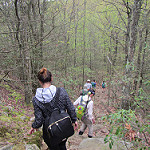

In [0]:
data.test_ds.x[0]

In [0]:
submission = pd.DataFrame({'image_name': os.listdir('data/test'), 'label': a})
submission.head(10)

,image_name,label
0,2977.jpg,2
1,22751.jpg,5
2,16653.jpg,4
3,11240.jpg,1
4,3705.jpg,3
5,21795.jpg,3
6,20852.jpg,3
7,15083.jpg,5
8,1918.jpg,1
9,15513.jpg,5


In [0]:
submission.to_csv(path/'submission_fastai_res50_224_postmixup.csv', index=False)

## Post Mixup

In [0]:
!mkdir data/models

In [0]:
learn50 = cnn_learner(get_data(224, 64), models.resnet50, metrics=[error_rate, accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_224')]).load('res50_224')

In [0]:
learn50.fit_one_cycle(42)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.169627,0.107098,0.035526,0.964474,03:52
1,0.159632,0.103322,0.034645,0.965355,03:53
2,0.138173,0.100990,0.036994,0.963006,03:53
3,0.150531,0.099200,0.033470,0.966530,03:53
4,0.149467,0.096371,0.032002,0.967998,03:54
5,0.144752,0.093775,0.032296,0.967704,03:52
6,0.131178,0.102222,0.034645,0.965355,03:53
7,0.137633,0.103695,0.036406,0.963594,03:52
8,0.139511,0.096862,0.033177,0.966823,03:53
9,0.129844,0.111109,0.037581,0.962419,03:53


Better model found at epoch 0 with accuracy value: 0.9644744396209717.
Better model found at epoch 1 with accuracy value: 0.9653552770614624.
Better model found at epoch 3 with accuracy value: 0.9665296673774719.
Better model found at epoch 4 with accuracy value: 0.967997670173645.


KeyboardInterrupt: ignored

In [0]:
learn50.unfreeze()
learn50.fit_one_cycle(15)
learn50.save('res50_224_postmixup')

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.131589,0.125351,0.040517,0.959483,05:03
1,0.184611,0.165014,0.051967,0.948033,05:04
2,0.221252,0.288192,0.091897,0.908103,05:04
3,0.267738,0.202673,0.066941,0.933059,05:04
4,0.235565,0.213074,0.076923,0.923077,05:04
5,0.230130,0.238004,0.080446,0.919554,05:05
6,0.205474,0.189068,0.066353,0.933647,05:06
7,0.186147,0.219930,0.073987,0.926013,05:06
8,0.157497,0.169047,0.059601,0.940399,05:05
9,0.112386,0.159929,0.051967,0.948033,05:04


Better model found at epoch 0 with accuracy value: 0.95948326587677.


In [0]:
learn50 = learn50.load('best_224')

In [0]:
log_preds, test_labels = learn50.get_preds(ds_type=DatasetType.Test)

In [0]:
preds = np.argmax(log_preds, 1)
preds

tensor([2, 5, 4,  ..., 5, 4, 2])

In [0]:
a = np.array(preds)

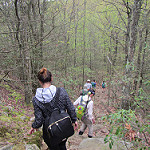

In [0]:
data.test_ds.x[0]

In [0]:
submission = pd.DataFrame({'image_name': os.listdir('data/test'), 'label': a})
submission.head(10)

,image_name,label
0,2977.jpg,2
1,22751.jpg,5
2,16653.jpg,4
3,11240.jpg,1
4,3705.jpg,3
5,21795.jpg,3
6,20852.jpg,3
7,15083.jpg,5
8,1918.jpg,1
9,15513.jpg,5


In [0]:
submission.to_csv(path/'submission_fastai_res50_224_postmixup_best.csv', index=False)

## Tuning LR

In [0]:
learn50 = cnn_learner(get_data(224, 64), models.resnet50, metrics=[error_rate, accuracy]).load('best_224')
learn50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


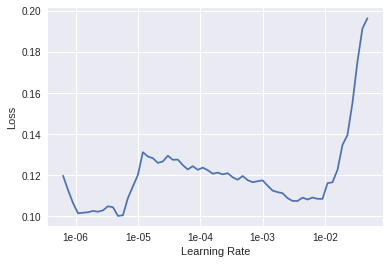

In [0]:
learn50.recorder.plot()

In [0]:
learn50.fit_one_cycle(42, max_lr=1e-06)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.126419,0.090220,0.031122,0.968878,03:52
1,0.130809,0.094509,0.034058,0.965942,03:53
2,0.122207,0.092539,0.032296,0.967704,03:53
3,0.117037,0.094514,0.033764,0.966236,03:53
4,0.116662,0.094491,0.033764,0.966236,03:53
5,0.116675,0.096266,0.034645,0.965355,03:53
6,0.114062,0.090501,0.030828,0.969172,03:53
7,0.111014,0.089556,0.031122,0.968878,03:53
8,0.111530,0.091155,0.031415,0.968585,03:53
9,0.111642,0.087770,0.028479,0.971521,03:53


In [0]:
learn50.save('res50_224_postmixup_lr_0')
learn50.unfreeze()
learn50.fit_one_cycle(15, max_lr=1e-06)
learn50.save('res50_224_postmixup_lr_1')

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.022152,0.254409,0.063418,0.936583,05:04
1,0.020465,0.257970,0.064592,0.935408,05:04
2,0.019799,0.256102,0.064005,0.935995,05:04
3,0.023016,0.255583,0.061069,0.938931,05:05
4,0.019377,0.257339,0.062830,0.937170,05:06
5,0.022343,0.256336,0.065179,0.934821,05:07


In [0]:
log_preds, test_labels = learn50.get_preds(ds_type=DatasetType.Test)

In [0]:
preds = np.argmax(log_preds, 1)
preds

In [0]:
a = np.array(preds)

In [0]:
data.test_ds.x[0]

In [0]:
submission = pd.DataFrame({'image_name': os.listdir('data/test'), 'label': a})
submission.head(10)

In [0]:
submission.to_csv(path/'submission_fastai_res50_224_postmixup_lr.csv', index=False)